w[0]: 0.393906  b: -0.031804


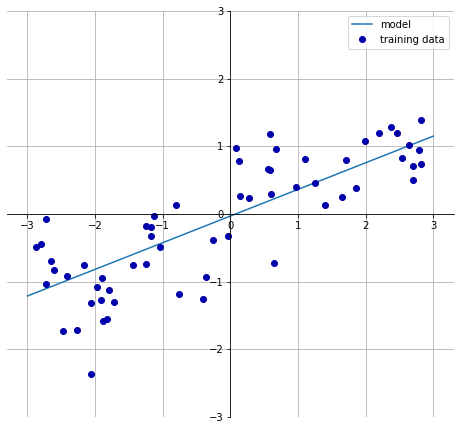

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

lr=LinearRegression().fit(X_train, y_train)


In [3]:
print ("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


- intercept_ 속성은 항상 실수값 하나지만, coef_ 속성은 각 입력 feature에 하나씩 대응되는 Numpy 배열임  
- wave 데이터셋에는 입력 feature가 하나뿐이므로 lr.coef_ 도 원소를 하나만 가지고 있음  

In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


- R<sup>2</sup> 값이 0.66 인 것은 그리 좋은 결과가 아님  
- 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷, 즉 과대적합이 아니라 과소적합인 상태를 의미  
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음  
- 그러나 feature 가 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음  
- LinearRegression 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 동작하는지 확인해보자  
- 이 데이터셋에는 샘플이 506개, feature는 확장된 것을 포함해 104개

In [5]:
X, y=mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


In [8]:
#과대적합: training set score > test set score
#과소적합: training set score =~ test set score

- 이런 성능의 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함
- 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 리지 (Ridge) 회귀임

### Ridge Regression  
- 리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용   
- 하지만 리지 회귀에서는 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음  
- 가중치의 절대값을 가능한 한 작게 만드는 것, 즉 w의 모든 원소가 0에 가깝게 되길 원함  
- 이는 모든 feature가 출력에 주는 영향을 최소한으로 만듬(기울기를 작게 만듬)  
- 이런 제약을 규제(Regularization)라 함  
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미  
- 리지 회귀에 사용하는 규제 방식을 L2 규제라 함  
- 리지 회귀는 linear_model.Ridge에 구현되어 있음  

In [9]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


- 훈련 세트의 점수는 Linear Regression 보다 낮지만 테스트 세트에 대한 점수는 더 놓음
- 모델의 복잡도가 낮아지면 훈련 세트의 성능은 나빠지지만 더 일반화 된 모델이 됨 
- Ridge 는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를  절충할 수 있는 방법을 제공함  
- 사용자는 alpha 매개변수로 훈현 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정  
- 앞의 예제에서는 기본값인 alpha=1.0 을 사용  
- 최적의 alpha 값은 사용하는 데이터셋에 의존적임  
- alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줌

In [10]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


- alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 과대적합쪽으로 이동하는 경향이 됨 
- 아주 작은 alpha값은 계수를 거의 제한하지 않으므로 Linear Regression 으로 만든 모델과 거의 같아짐 (alpha=0.00001)

- 이 코드에서는 alpha=0.1 이 꽤 좋은 성능을 보임  
- 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임  
- alpha 값이 모델 복잡도와 어떤 관련이 있는지 살펴봄(좋은 매개변수를 선택하는 문제는 또 다른 영역)  
- 또한 alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해 보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음  
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_ 의 절대값 크기가 작을 것이라고 예상할 수 있음


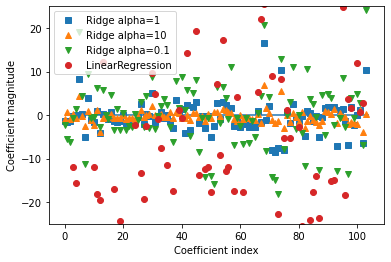

In [12]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것  
- 다음은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것임  
- 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(Learning curve) 라고 함

In [13]:
print("{1} {0} {2}".format('abc','def','ghi'))

def abc ghi


In [14]:
print("{0}".format('python'))

python


In [15]:
print("{0:>10s}".format('python'))

    python


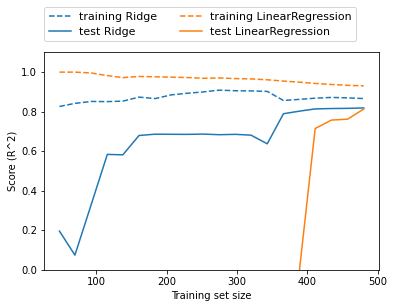

In [16]:
mglearn.plots.plot_ridge_n_samples()

- 리지는 규제가 적용되므로 선형 회귀보다는 전반적으로 훈련 데이터 점수가 낮음  
- 그러나 테스트 데이터에서는 리지의 점수가 더 높음  
- 두 모델 전부 데이터가 많아질수록 성능이 향상됨  
- 데이터가 많아질수록 선형 회귀의 모델은 데이터를 기억하거나 과대적합하기가 어려워짐을 보임

### 라소(Lasso)  
- 리지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 함  
- L1 규제를 사용함, 실제 특정 계수는 0이 됨, 즉 모델에서 완전히 제외되는 feature가 생김  
- 일종의 feature selection이 자동으로 이루어짐  
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 feature가 무엇인지 드러내 줌  


In [17]:
#boston 주택 가격 예제를 이용해서 라소 모델을 이해해보자

In [18]:
from sklearn.linear_model import Lasso
import numpy as np

lasso=Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))

print("Number of features used:", np.sum(lasso.coef_ !=0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [21]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train) 
#max_iter: lasso model 안에서 반복하는 횟수
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))

print("Number of features used:", np.sum(lasso001.coef_ !=0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [22]:
lasso0001=Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train) 

print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test,y_test)))

print("Number of features used:", np.sum(lasso0001.coef_ !=0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

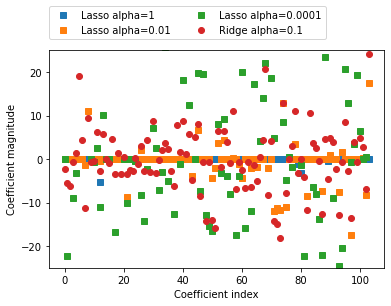

In [23]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'s',label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_,'s',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- alpha=0.1 인 리지 모델은 alpha=0.01 인 라소 모델과 성능이 비슷하지만 리지를 사용하면 어떤 계수도 0이 되지 않음  
- 실제로 이 두 모델 중 보통은 리지 회귀를 선호함  
- 하지만 feature가 많고 그 중 일부만 중요하다면 라소가 더 좋은 선택일 수 있음  
- 또한 분석하기 쉬운 모델을 원한다면 라소가 입력 feature 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줌  
- scikit-learn 은 라소와 리지의 페널티를 결합한 Elasticnet도 제공함, 실제로 이 조합은 최상의 성능을 내지만 L1, L2 규제를 위한 매개변수 두 개를 조정해야함

### 분류용 선형 모델  
- 이진 분류(binary classification)의 경우 예측을 위한 방정식은 다음과 같음  
- 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  > 0  
- feature 들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교  
- 함수에서 계산한 값이 0보다 작으면 클래스를 -1 이라고 예측, 0보다 크면 +1 이라고 예측  
- 이 규칙은 분류에 쓰이는 모든 선형 모델에서 동일함  
- 여기에서도 계수(w)와 절편(b)을 찾기 위한 방법이 많이 있음

- 회귀용 선형 모델에서는 출력 y가 feature의 선형 함수임, 즉 직선, 평면, 초평면 임  
- 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수임, 즉 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기 임  

#### 선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분할 수 있음  
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법  
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

- 알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다름  
- 불행하게도 수학적이고 기술적인 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능함  
- 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실함수 loss function)에 대한 차이는 크게 중요하지 않음  
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 로지스틱 회귀(Logistic Regression)와  
- svm.LinearSVC(Support Vector Classifier)에 구현된 선형 서포트 벡터 머신 임  

C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


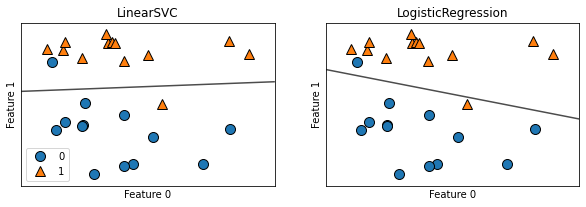

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

- 이전 처럼 forge 데이터셋의 첫 번째 feature를 x 축에 놓고 두 번째 feature를 y 축에 적용  
- 직선 위는 클래스 1, 아래는 클래스 0  
- 즉 새로운 데이터가 직선 위에 위치하면 클래스 1로 분류, 반대인 경우 클래스 0으로 분류 됨

- 위 두 모델은 L2 규제를 사용
- LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C
- C의 값을 증가시키면 규제가 감소, 즉 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려고 함
- 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듬(Ridge의 alpha 값과 반대)
- 다른 표현으로, 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면(포괄적으로)
- C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것임(Overfitting)

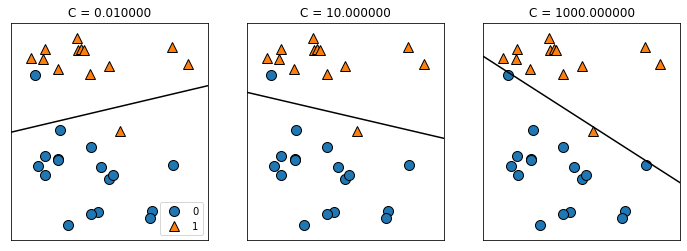

In [25]:
mglearn.plots.plot_linear_svc_regularization()

- 첫 번째 그림은 아주 작은 C 값 때문에 규제가 많이 적용되었음, 클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있음  
- 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만들었고, 잘못 분류한 데이터 포인트는 두 개임  
- 두 번째 그림은 C 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌음  
- 마지막 그림에서 C 값을 아주 크게 했더니, 결정 경계는 더 기울어졌고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류  
- 이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없기에 클래스 1의 포인트 하나는 여전히 잘못 분류되었음  
- 마지막 그림의 모델은 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못한 것임, 즉 Overfitting  
- 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보임  
- 그러나 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 feature 가 많아지면 과대적합되지 않도록 하는 것이 매우 중요함

In [33]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg=LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format (logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.951


C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 기본값 C=1 이 훈련 세트와 테스트 세트 양쪽에 94% ~ 96% 정확도를 내는 훌륭한 성능  
- 하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합일 가능성 큼  
- 모델의 제약을 더 풀어주기 위해 C를 증가시켜 보겠음

In [34]:
logreg10=LogisticRegression(C=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format (logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.965


C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- C=10 을 사용하니 훈련 세트의 정확도가 조금 더 증가했음  
- 이는 복잡도가 높은 모델일수록 성능이 좋아짐을 의미함  
- 이번엔 규제를 더 강하게 하기 위해 C=0.01을 사용해 봄

In [35]:
logreg01=LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format (logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 예상대로 이미 과소적합된 모델에서 더 과소적합쪽으로 이동하여 훈련 세트와 테스트 세트의 정확도는 기본 매개변수일 때보다 낮아짐 

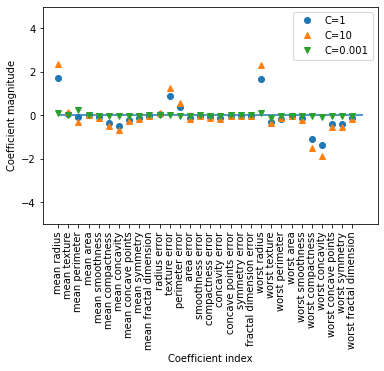

In [36]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=10")
plt.plot(logreg01.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

- 더 이해하기 쉬운 모델을 원한다면 L1규제를 사용하는 것이 좋음
- 다음은 L1 규제를 사용할 때의 분류 정확도와 계수 그래프임

In [37]:
#분류정확도와 계수그래프

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


C:\Users\soeun.DESKTOP-Q3NNR1M\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


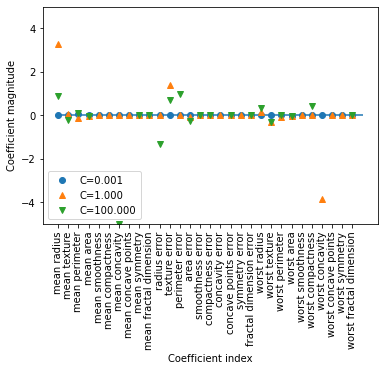

In [38]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

- 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많음  
- 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 feature를 이용할지 일부 feature만을 사용할지 결정하는 penalty 매개변수임

### 다중 클래스 분류용 선형 모델  
- LogisticRegression 을 제외하면 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함  
- 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one-vs.-rest) 방법임  
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴  
- 결국 클래스의 수만큼 이진 분류 모델이 만들어짐  
- 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택함  
- 클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터(w)와 절편(b)을 하나씩 갖게 됨  
- 결국 분류 신뢰도를 나타내는 다음 공식의 결과값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됨  
- w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  
- 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해 보겠음  
- 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따름

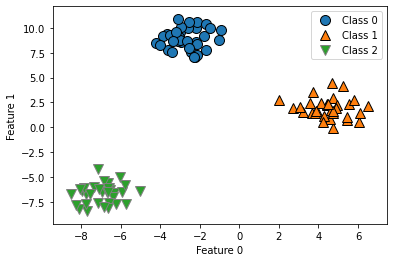

In [40]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 
plt.legend(["Class 0", "Class 1", "Class 2"])

In [42]:
linear_svm=LinearSVC().fit(X,y)

print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


- coef_ 배열의 크기는 (3, 2), coef_ 의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있음
- 열은 각 feature에 따른 계수 값(이 데이터셋에서는 두 개)을 가지고 있음
- intercept_ 는 각 클래스의 절편을 담은 1차원 벡터

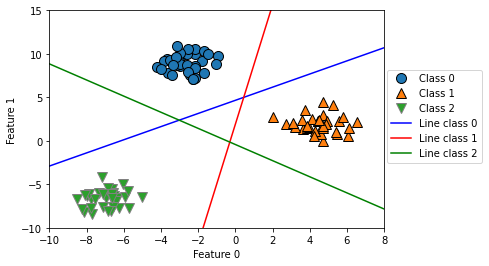

In [43]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

- 클래스 0 에 속한 모든 포인트는 나머지 클래스의 직선 위에 있으므로 나머지 클래스들에 의해 others 로 분류됨
- 그림 중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류함  
- 이 곳의 데이터 포인트는 어떤 클래스로 분류되는가?  
- 분류 공식의 결과가 가장 높은 클래스로 분류됨, 즉 가장 가까운 직선의 클래스로 됨  

Text(0, 0.5, 'Feature 1')

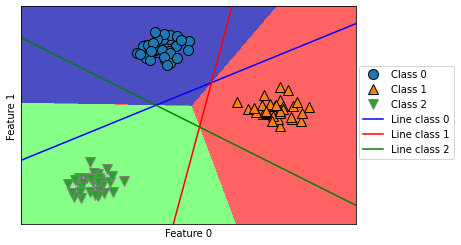

In [44]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 장단점과 매개변수  
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha 였고, LinearSVC와 LogisticRegression 에서는 C 임  
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해 짐  
- 보통 C와 alpha는 로그 스케일로 최적치를 정함(10배씩 변경)  
- 그리고 L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함  
- 중요한 feature가 많지 않다고 생각하면 L1 규제를 사용, 그렇지 않다면 기본적으로 L2 규제를 사용해야 함  
- 모델의 해석이 중요한 경우 L1 규제는 해당 모델의 중요한 feature가 무엇이고 얼마나 영향을 미치는지 설명하지 쉬움  
- 선형 모델은 학습 속도가 빠르고 예측도 빠름  
- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동함  
- 선형 모델은 샘플에 비해 feature가 많을 때 잘 동작함